In [11]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/Software/mySoftware/Python/'); 
from my_tools               import *; 
from plot_tools             import *;
from my_data_analysis_tools import *;

%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

In [12]:
main_data_path = '/Users/erezcohen/Desktop/data/BAND/AnalysisFiles/AnalysisCSVfiles/'

In [13]:
os.listdir(main_data_path)

['events_011265.csv', 'README', 'skimmed_SIDIS_and_BAND_inc_006420.csv']

# First look at BAND data 
Skimmed SIDIS merged with Skimmed neutron from BAND

July-22, 2021 (EOC)

data train from:
/volatile/clas12/rg-b/production/recon/spring2019/torus-1/pass1/v0/dst/train_20200610/inc/

In [14]:
run_number = 6420
events = pd.read_csv(main_data_path + "skimmed_SIDIS_and_BAND_inc_00%d"%run_number + ".csv")

## Event kinematics
We selected SIDIS events of type
$$ (e,e' N_{\pi^+} N_{n})X$$
where $N_{\pi^+}>0$ 

In [15]:
events[0:3]

,runID,eventID,livetime,current,xB,Q2,Ebeam,z,e_Px,e_Py,e_Pz,e_E,q_Px,q_Py,q_Pz,q_E,Ve_z,Vpiplus_z,goodneutron,Unnamed: 19
0,6420,1320.0,0,47.244,0.248259,4.03903,10.1998,0.178776,-0.467273,0.590221,1.33214,1.53013,0.000000e+00,0.000000e+00,8.89976,8.66987,-4.06827,-3.09369,1,NaN
1,6420,1890.0,0,47.244,0.286849,2.11590,10.1998,0.280869,-0.608027,-0.959182,6.16547,6.26919,2.220450e-16,0.000000e+00,4.19132,3.93081,-1.29460,-2.47987,1,NaN
2,6420,2497.0,0,47.244,0.558507,1.80187,10.1998,0.399698,1.219530,0.055821,8.39243,8.48076,4.440890e-16,2.775560e-17,2.18120,1.71924,-0.00530,-3.49487,1,NaN


## Outgoing electron

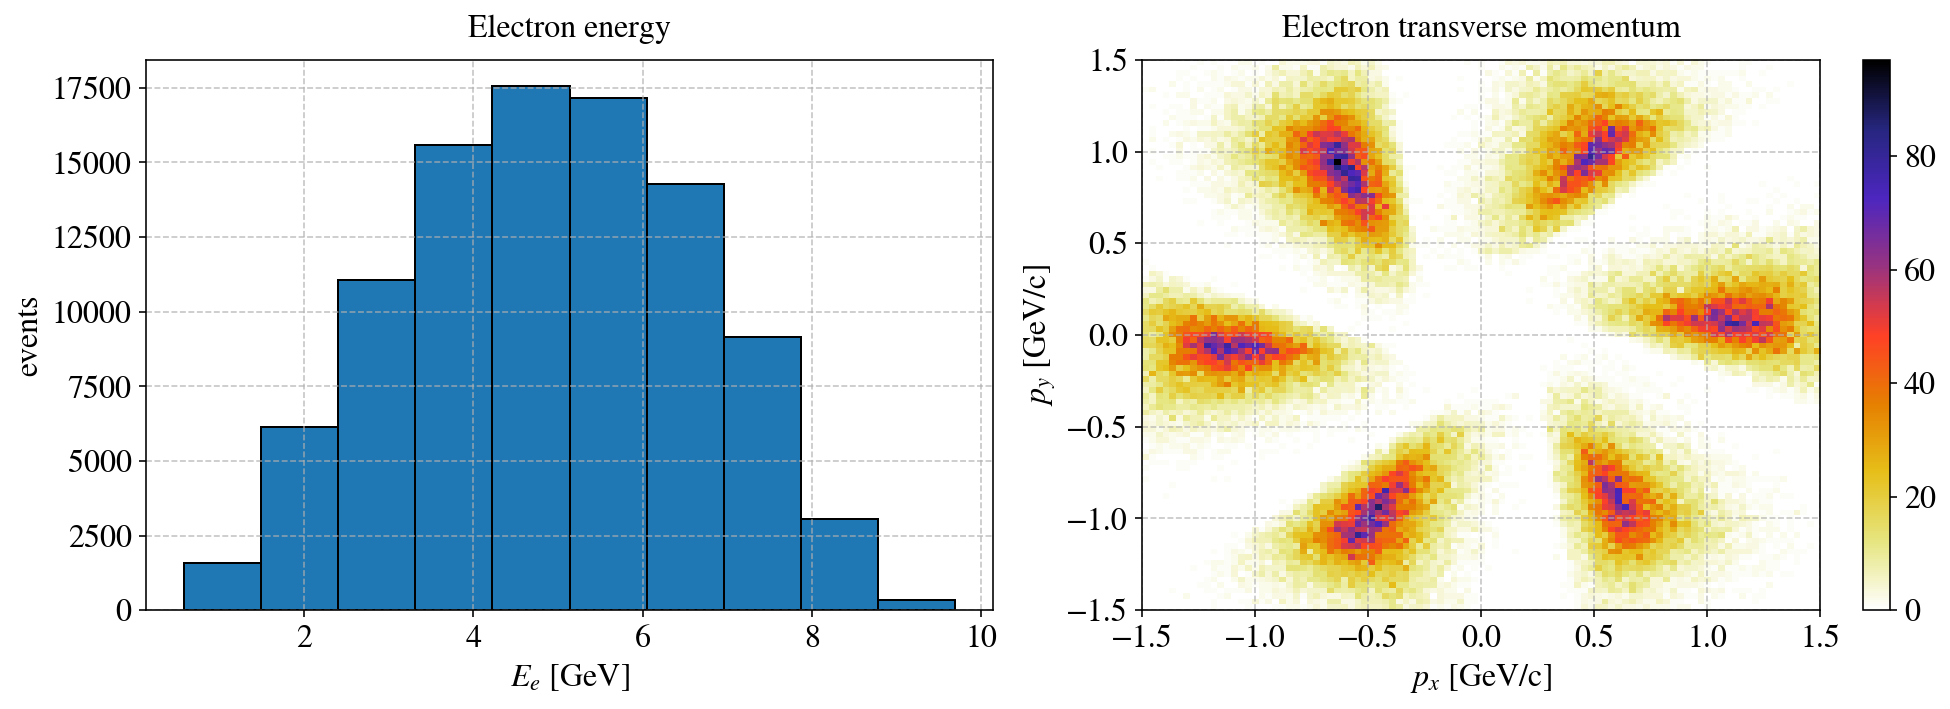

In [16]:
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(1,2,1)
plt.hist(events.e_E,edgecolor='k')
set_axes(ax,'$E_e$ [GeV]','events',title='Electron energy',fontsize=16,do_add_grid=True);

ax = fig.add_subplot(1,2,2)
h=ax.hist2d( events.e_Px, events.e_Py , 
            bins=(np.linspace(-1.5,1.5,100),np.linspace(-1.5,1.5,100))
            , cmap='CMRmap_r' )
cbar=fig.colorbar(h[3],ax=ax); cbar.ax.tick_params(labelsize=16)


set_axes(ax,'$p_x$ [GeV/c]','$p_y$ [GeV/c]',
         title='Electron transverse momentum',fontsize=16,do_add_grid=True);

plt.tight_layout()

## event kinematics

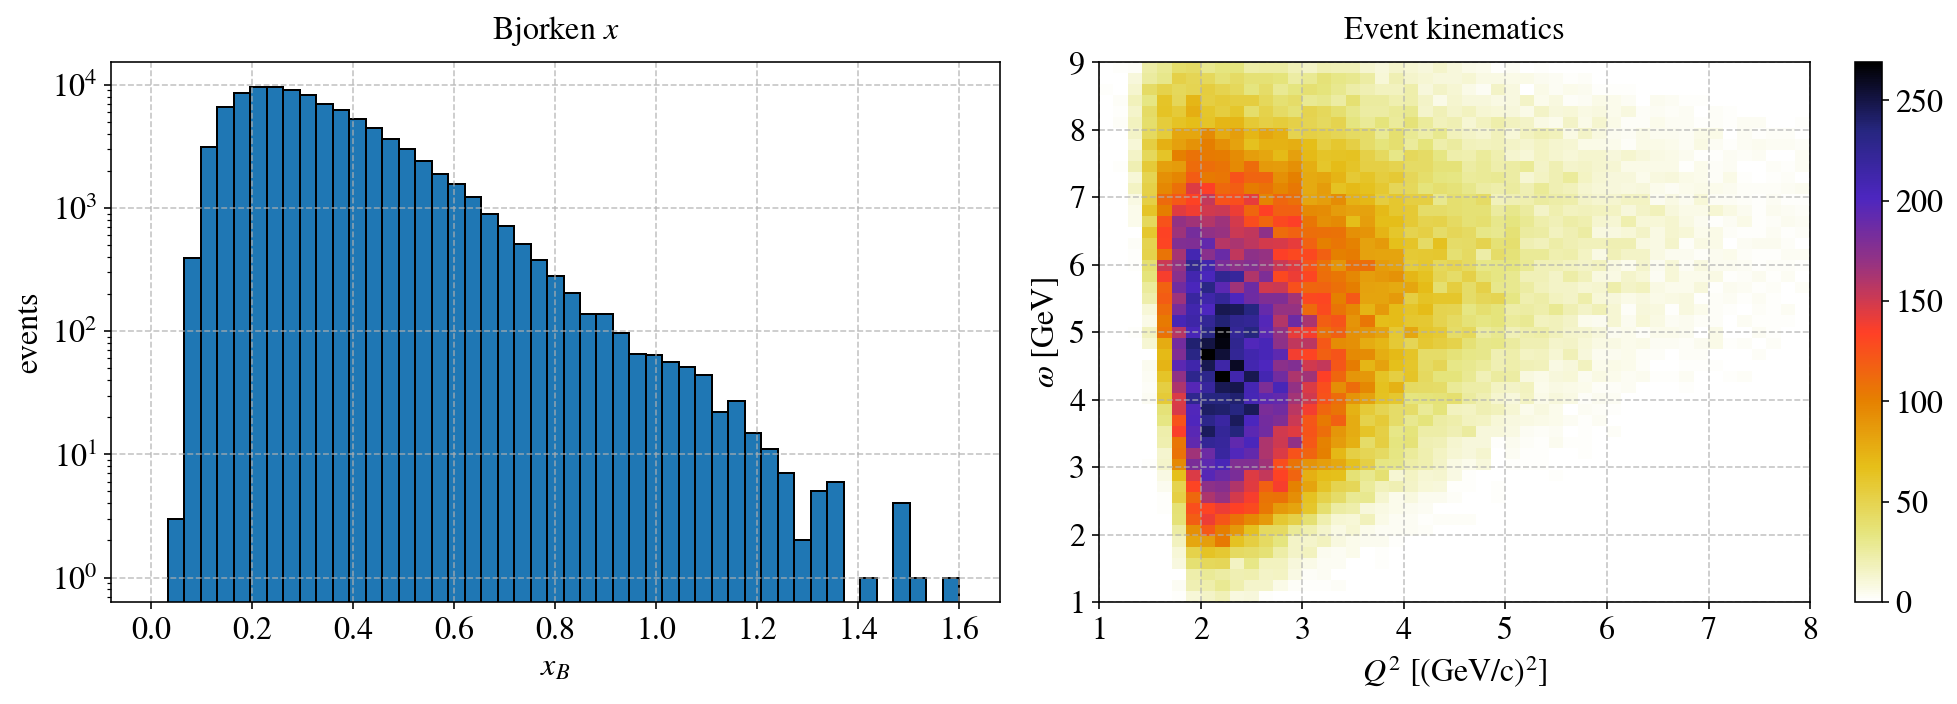

In [21]:
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(1,2,1)
plt.hist(events.xB,bins=np.linspace(0,1.6,50),edgecolor='k')
set_axes(ax,'$x_B$','events',title='Bjorken $x$',fontsize=16,do_add_grid=True);
ax.set_yscale('log')

ax = fig.add_subplot(1,2,2)
h=ax.hist2d( events.Q2, events.q_E , 
            bins=(np.linspace(1,8,50),np.linspace(1,9,50)),
            cmap='CMRmap_r' )
cbar=fig.colorbar(h[3],ax=ax); cbar.ax.tick_params(labelsize=16)


set_axes(ax,'$Q^2$ [(GeV/c)$^2$]','$\omega$ [GeV]',
         title='Event kinematics',fontsize=16,do_add_grid=True);

plt.tight_layout()

## W - the mass of the hadronic system from the electron information
$$W = M^2 + 2M\omega - Q^2$$

In [23]:
Mp = 0.939;
Mp2 = Mp*Mp
events.W = np.array(Mp2 + 2*Mp*events.q_E - events.Q2)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


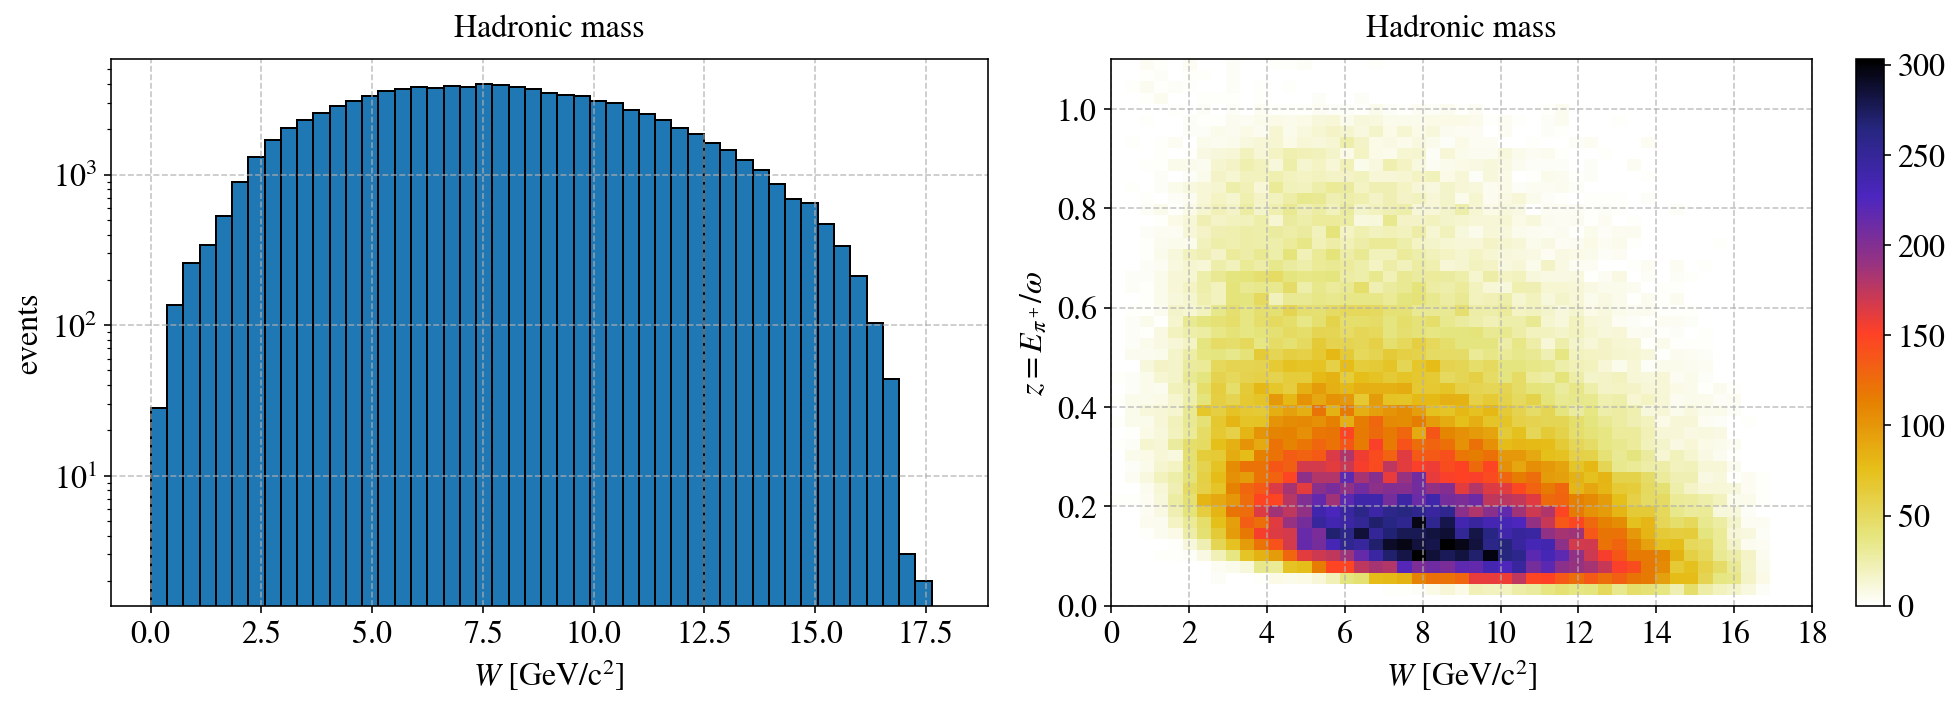

In [31]:
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(1,2,1)
plt.hist(events.W,bins=np.linspace(0,18,50),edgecolor='k')
set_axes(ax,'$W$ [GeV/c$^2$]','events',title='Hadronic mass',fontsize=16,do_add_grid=True);
ax.set_yscale('log')

ax = fig.add_subplot(1,2,2)
h=ax.hist2d( events.W, events.z , 
            bins=(np.linspace(0,18,50),np.linspace(0,1.1,50)),
            cmap='CMRmap_r' )
cbar=fig.colorbar(h[3],ax=ax); cbar.ax.tick_params(labelsize=16)


set_axes(ax,'$W$ [GeV/c$^2$]','$z=E_{\pi^+}/\omega$',
         title='Hadronic mass',fontsize=16,do_add_grid=True);

plt.tight_layout()

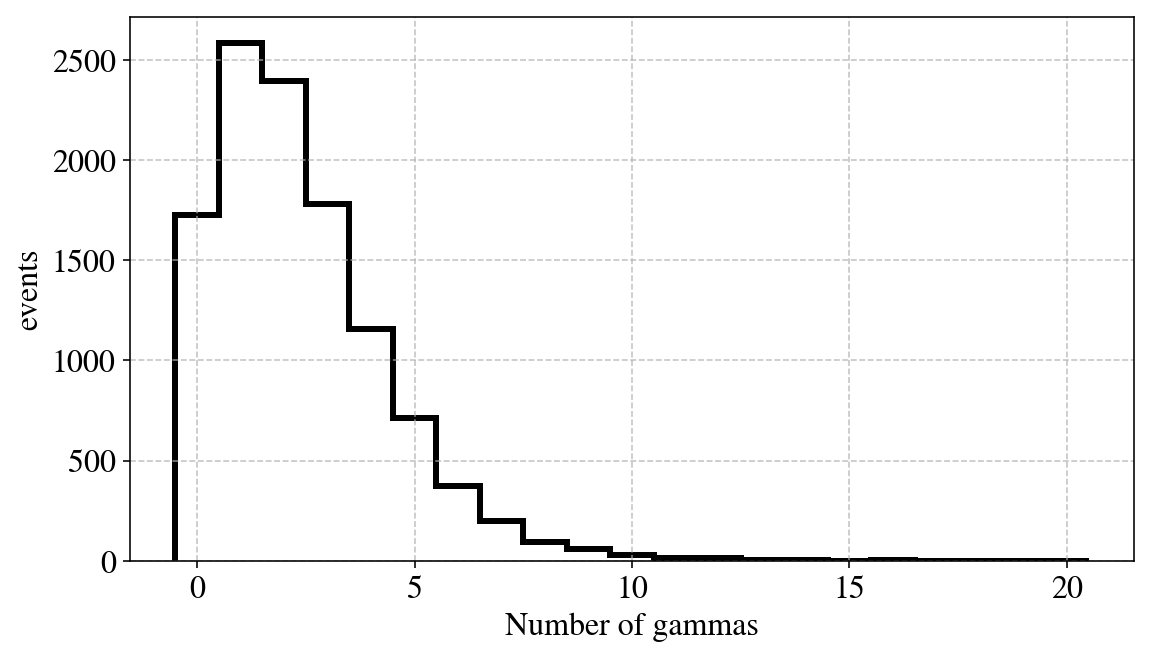

In [12]:
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)
plot_discrete_histogram(events.Ngammas)
set_axes(ax,'Number of gammas','events',fontsize=16,do_add_grid=True);

## TBD: $\vec{p}_{miss}$, $\vec{q}$ (need incoming beam energy for this) and the FOMs we use for event selection cuts...

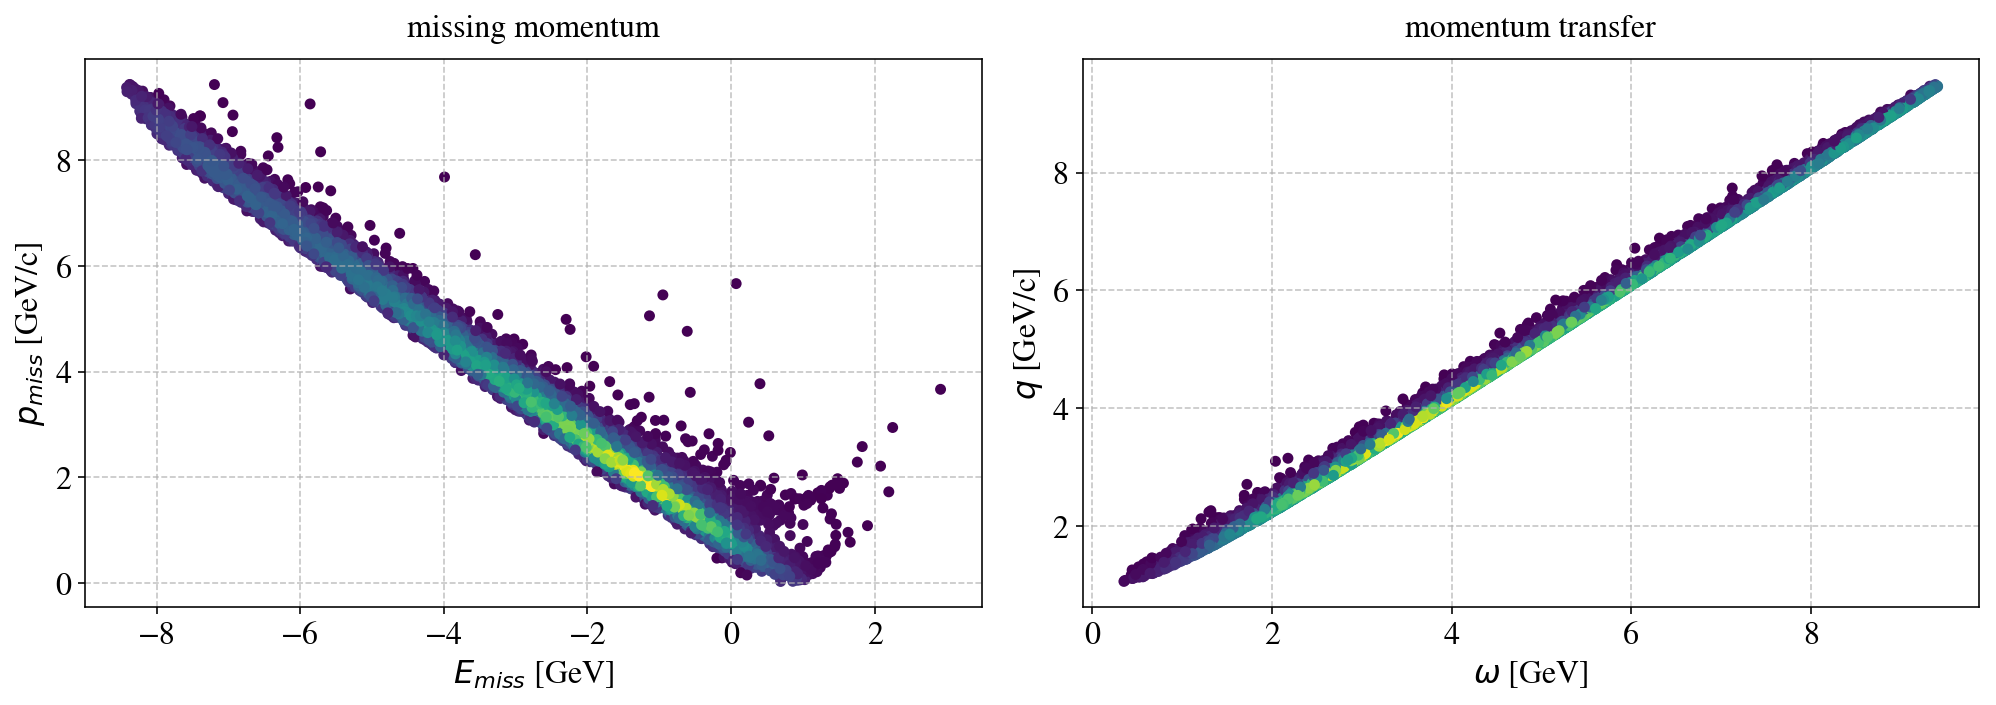

In [16]:
fig = plt.figure(figsize=(14,5))

ax = fig.add_subplot(1,2,1)
scatter_plot_with_kernel(events.Emiss,
                         np.sqrt(np.square(events.Pmiss_x)+np.square(events.Pmiss_y)+np.square(events.Pmiss_z)), s=20)
set_axes(ax,'$E_{miss}$ [GeV]','$p_{miss}$ [GeV/c]',title='missing momentum',fontsize=16,do_add_grid=True);

ax = fig.add_subplot(1,2,2)
scatter_plot_with_kernel(events.omega,np.sqrt(np.square(events.q_x)+np.square(events.q_y)+np.square(events.q_z)), s=20)
set_axes(ax,'$\omega$ [GeV]','$q$ [GeV/c]',
         title='momentum transfer',fontsize=16,do_add_grid=True);


plt.tight_layout()

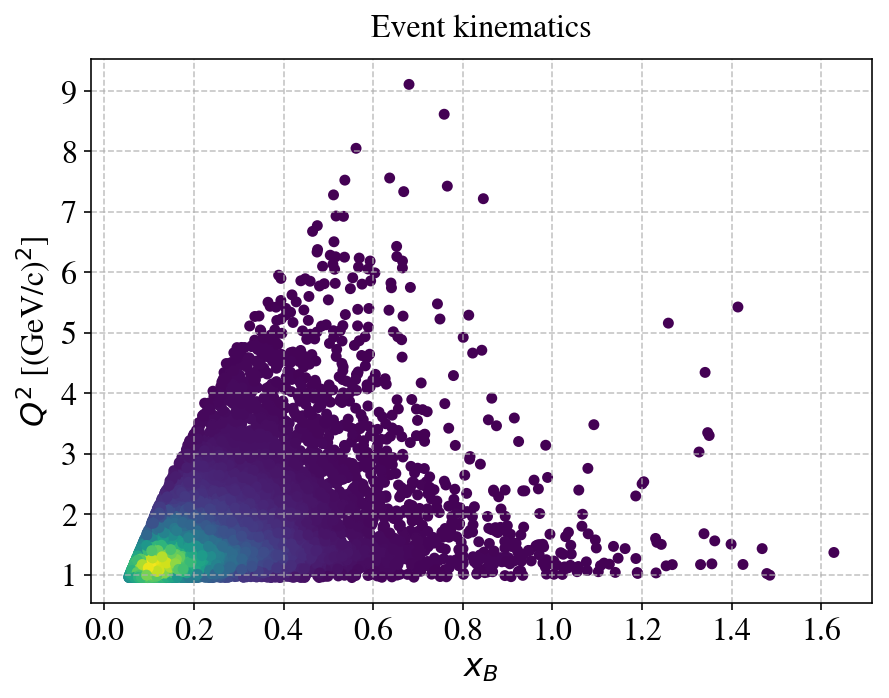

In [19]:
fig = plt.figure(figsize=(7,5))

ax = fig.add_subplot(1,1,1)
scatter_plot_with_kernel(events.xB,events.Q2, s=20)
set_axes(ax,'$x_B$','$Q^2$ [(GeV/c)$^2$]',title='Event kinematics',fontsize=16,do_add_grid=True);


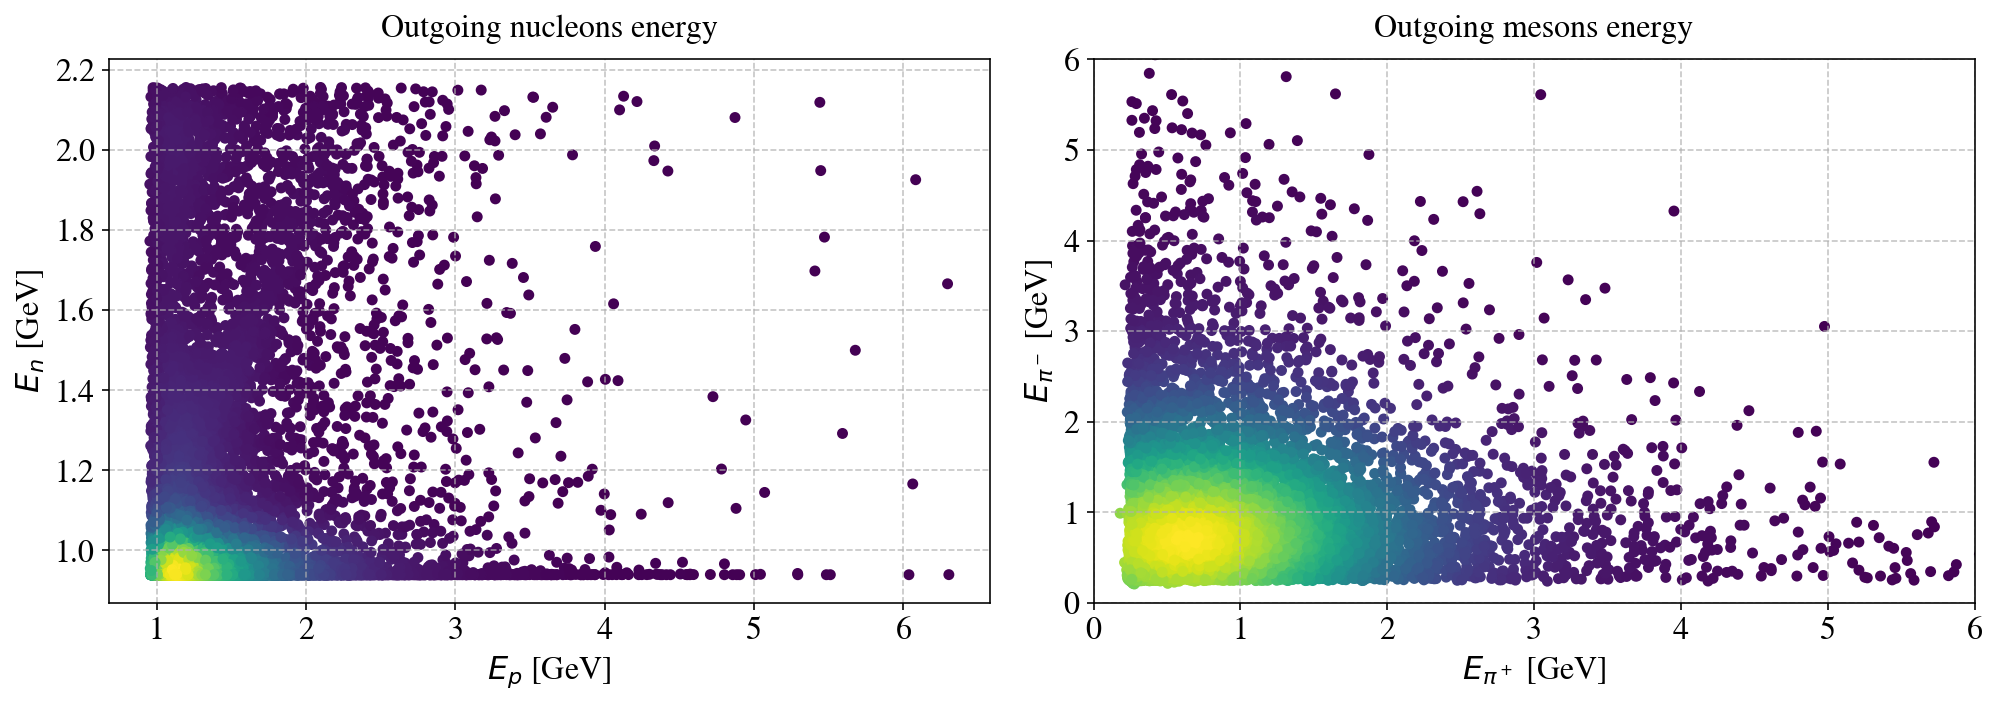

In [20]:
fig = plt.figure(figsize=(14,5))

ax = fig.add_subplot(1,2,1)
scatter_plot_with_kernel(events.E_p,events.E_n, s=20)
set_axes(ax,'$E_p$ [GeV]','$E_n$ [GeV]',title='Outgoing nucleons energy',fontsize=16,do_add_grid=True);

ax = fig.add_subplot(1,2,2)
scatter_plot_with_kernel(events.Epips,events.Epims, s=20)
set_axes(ax,'$E_{\pi^+}$ [GeV]','$E_{\pi^-}$ [GeV]',xlim=(0,6),ylim=(0,6),
         title='Outgoing mesons energy',fontsize=16,do_add_grid=True);


plt.tight_layout()